In [0]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from tensorflow.python.keras.layers import Dense,LSTM
from tensorflow.python.keras import Sequential
from keras import metrics
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2008-01-01', end='2020-01-01')
#Show teh data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2008-01-02,28.608572,27.507143,28.467142,27.834286,269794700.0,24.161295
2008-01-03,28.198572,27.527143,27.915714,27.847143,210516600.0,24.172449
2008-01-04,27.571428,25.555714,27.350000,25.721428,363958000.0,22.327251
2008-01-07,26.228571,24.318571,25.892857,25.377142,518048300.0,22.028393
2008-01-08,26.065714,24.400000,25.734285,24.464285,380954000.0,21.235991
...,...,...,...,...,...,...
2019-12-24,284.890015,282.920013,284.690002,284.269989,12119700.0,283.596924
2019-12-26,289.980011,284.700012,284.820007,289.910004,23280300.0,289.223602
2019-12-27,293.970001,288.119995,291.119995,289.799988,36566500.0,289.113831


In [0]:
#Get the number of rows and columns in the data set
df.shape

(3021, 6)

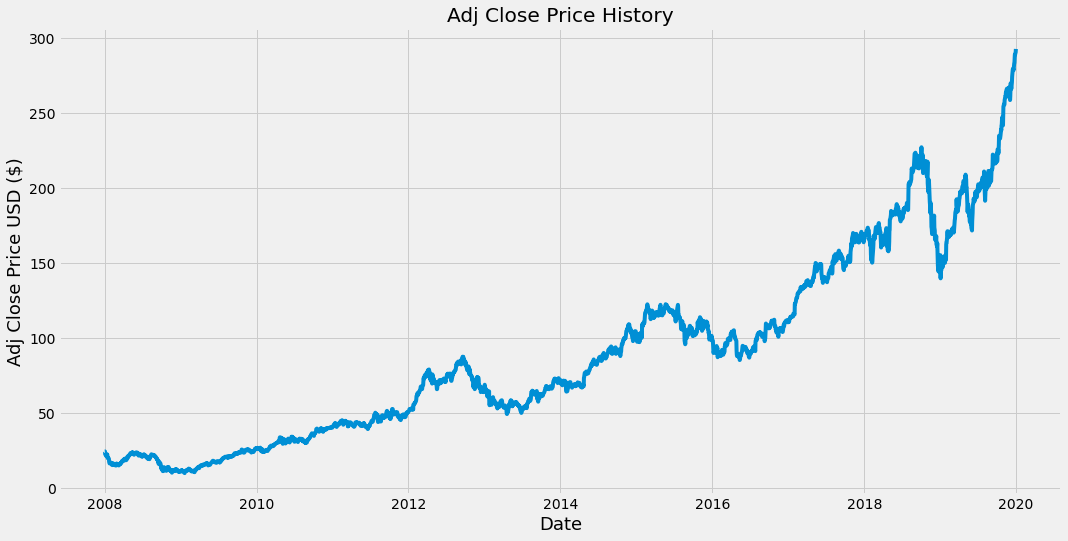

In [0]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Adj Close Price History')
plt.plot(df['Adj Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.show()

In [0]:
#Create a new dataframe with only the 'Close column
data = df.filter(['Adj Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

2417

In [0]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.05106322],
       [0.0511026 ],
       [0.0445884 ],
       ...,
       [0.98644032],
       [0.99249821],
       [1.        ]])

In [0]:
#Create the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.05106322, 0.0511026 , 0.0445884 , 0.04353332, 0.04073585,
       0.04430383, 0.04369968, 0.0413663 , 0.0440324 , 0.03976837,
       0.0356532 , 0.03620042, 0.03640617, 0.03390206, 0.02664796,
       0.02512885, 0.02268163, 0.02268163, 0.02335143, 0.02363165,
       0.02502377, 0.02431897, 0.0233996 , 0.02239705, 0.01917498,
       0.01884227, 0.02069846, 0.02243648, 0.02042704, 0.02241458,
       0.02156528, 0.02032635, 0.01925377, 0.01997175, 0.01897361,
       0.01806301, 0.01818559, 0.01792729, 0.01959526, 0.02263784,
       0.02049709, 0.01905679, 0.02032196, 0.02026507, 0.01870656,
       0.01928442, 0.01816368, 0.02151714, 0.02093925, 0.02177543,
       0.02119317, 0.02124571, 0.02391179, 0.02253279, 0.0241088 ,
       0.02684935, 0.02748413, 0.02927031, 0.02716455, 0.02837285])]
[0.028587356473268183]



In [0]:
#Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

In [0]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2357, 60, 1)

In [0]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
#Train the model
model.fit(x_train, y_train, epochs=1, batch_size=1)

2357/2357 [==============================] - 57s 24ms/step - loss: 3.9740e-04


In [0]:
#Create the testing data set
#Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
#Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [0]:
#Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

10.013691119385538

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


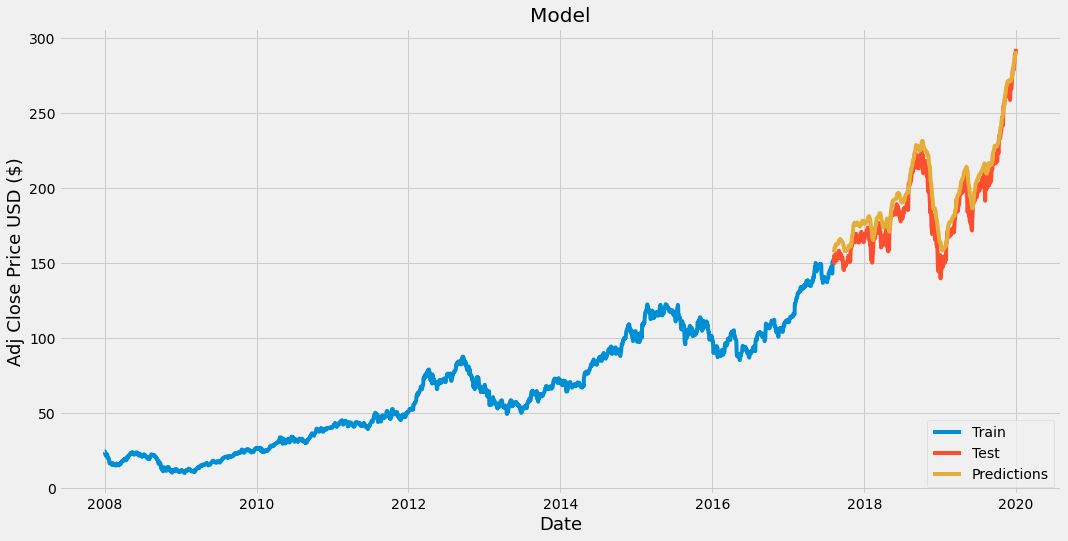

In [0]:

#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj Close Price USD ($)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [0]:
#Show the valid and predicted prices
valid

,Adj Close,Predictions
Date,,
2017-08-08,153.850388,157.218369
2017-08-09,154.792236,158.377792
2017-08-10,149.861832,159.563568
2017-08-11,151.945938,160.031006
2017-08-14,154.232635,160.393341
...,...,...
2019-12-24,283.596924,285.144196
2019-12-26,289.223602,286.342682
2019-12-27,289.113831,288.073456


In [0]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2019-09-01', end='2020-04-09')
#Create a new dataframe
new_df = apple_quote.filter(['Adj Close'])
#Get teh last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[265.09488]]


In [0]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-01-10', end='2020-04-10')
print(apple_quote2['Adj Close'])

Date
2020-01-10    309.595215
2020-01-13    316.209534
2020-01-14    311.939667
2020-01-15    310.602844
2020-01-16    314.493591
                 ...    
2020-04-03    241.410004
2020-04-06    262.470001
2020-04-07    259.429993
2020-04-08    266.070007
2020-04-09    267.989990
Name: Adj Close, Length: 63, dtype: float64


In [0]:
# Import metrics package from sklearn for statistical analysis
from sklearn import metrics

In [0]:
# Calculate and print values of MAE, MSE, RMSE
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
#print('Mean Squared Error:', metrics.mean_squared_error(y_test,predictions ))  
print('Mean Absolute Percentage Error:', np.mean(np.abs((predictions - y_test ) / y_test)*100)) 
print('Root Mean Squared Error:', np.sqrt(np.mean(((predictions- y_test)**2))))

Mean Absolute Percentage Error: 4.811443541534807
Root Mean Squared Error: 10.013691119385538
